Introduction & Background



---



Stage #1 - Dataset
==================
https://www.kaggle.com/datasets/sonalshinde123/social-media-mental-health-indicators-dataset?resource=download

This dataset captures the relationship between social media usage, screen-time behavior, and daily lifestyle factors such as sleep duration and interaction quality. It is useful for analyzing patterns that may influence mental well-being, digital habits, and behavioral trends among users.

The data contains individual-level entries with details like daily screen time, social media time, positive vs. negative interactions, demographic information, and sleep hours.

The data contains a mixture of six numerical and four categorical variable.

Column Name |	Description |
---|---|
person_name | Name or identifier of the person.|
age |	Age of the individual in years. |
date |	The date on which the data was recorded. |
gender |	Gender of the user (Male, Female, Other). |
platform |	Primary social media platform the person uses. |
daily_screen_time_min |	Total daily device screen time in minutes. |
social_media_time_min |	Total time spent on social media in minutes per day. |
negative_interactions_count |	Number of negative or harmful interactions experienced online. |
positive_interactions_count |	Number of positive or supportive interactions experienced online. |
sleep_hours |	Total number of hours the person sleeps per day. |
physical_activity_min | Daily physical activity duration (in minutes) |
anxiety_level | Anxiety level measured on a numerical scale |
stress_level | Stress level measured on a numerical scale |
mood_level | Mood level measured on a numerical scale |
mental_state | Overall mental condition (e.g., Stressed, Relaxed) |

In [ ]:
import pandas as pd
Data = pd.read_csv('mental_health_social_media.csv')
Data = Data.sort_values(by='date', ascending=True)
Data.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
4785,Saanvi Sharma,22,1/1/2024,Male,Snapchat,442,243,1,2,6.8,16,3,8,5,Stressed
326,Meera Iyer,24,1/1/2024,Male,Facebook,507,177,1,2,6.5,9,3,8,5,Stressed
1713,Vihaan Yadav,32,1/1/2024,Female,Instagram,349,174,1,2,7.3,25,3,7,6,Stressed
1684,Myra Iyer,43,1/1/2024,Female,WhatsApp,211,53,0,0,7.9,39,1,5,7,Healthy


In [ ]:
Data.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000




---



Stage #2 - Setting Up Problem
=============================


1. Project goal

    The purpose of this project is to **analyze digital behavior and its impact on sleep and online social interactions** by examining patterns of screen usage, social media engagement, and user demographics. Using this dataset, the project aims to uncover **meaningful behavioral differences, identify relationships among variables, and build predictive models** that explain how digital habits influence well-being.

    * Identifying Differences Between Two Groups
      * Objective
        > Determine whether there is a statistically significant difference in sleep duration between two user groups.

      * Method
        > * Split users into two groups based on social_media_time_min (above vs below median)
        > * Dependent variable: sleep_hours
        > * Statistical test: Independent samples t-test
      
      * Why this is interesting
        > It directly addresses concerns about excessive social media usage and its potential impact on sleep quality.


    * Identifying Relationships Using Regression Analysis
      * Objective
        > Examine how multiple variables relate to sleep duration.

      * Variabels
        > * Dependent variable: sleep_hours
        > * Independent variables:
        >   * daily_screen_time_min
        >   * social_media_time_min
        >   * negative_interactions_count
        >   * positive_interactions_count
        >   * age
      
      * Method
        > Multiple Linear Regression

      * Why this is interesting
        > It allows us to understand which factors have the strongest influence on sleep, while controlling for others.


    * Predicting Outcomes Using a Regression Model
      * Objective
        > Build a predictive model to estimate sleep duration based on digital behavior.

      * Variabels
        > * Dependent variable: sleep_hours
        > * Independent variables:
        >   * daily_screen_time_min
        >   * social_media_time_min
        >   * negative_interactions_count
        >   * positive_interactions_count
        >   * age
      
      * Method
        > Multiple Linear Regression

      * Why this is interesting
        > It allows us to understand which factors have the strongest influence on sleep, while controlling for others.



2. Define Statistical Test

    Initial insights into differences in sleep hours between two groups.

    * Statistic to infer:
      * Mean sleep_hours per group (μLow, μHigh)
      * Difference of means: Δ = μHigh − μLow
    * Hypotheses:
      * H₀: μLow = μHigh (no difference)
      * H₁: μLow ≠ μHigh (significant difference)
    * Test to use: Independent samples t-test
    * Confidence Interval: 95% CI for difference in means
    * Significance Level: α = 0.05


3. Define Design of Regression Model

    Comprehensive analysis aligned with the project goals.

    * Outcome variable: sleep_hours
    * Predictors:
      * daily_screen_time_min
      * social_media_time_min
      * negative_interactions_count
      * positive_interactions_count
      * age
    * model: sleep_hours = β0 + β1 + β2 + β3 + β4 + β5 + ε

      > β0 = intercept
      >
      > β1…β5 = coefisien for each predictors
      >
      > ε = error term



---



Stage 3 - Performing Statistical Test
=====================================











1. Substantive Question of Interest
  > Does social media usage affects sleep duration?

2. Steps
  * Split groups by median social_media_time_min
  * Hypotheses:
      * H₀: μLow = μHigh (no difference)
      * H₁: μLow ≠ μHigh (significant difference)
  * Run t-test
      * Model equation
      > sleep_hours = β0​ + β1​⋅High ​+ ε
      > Where:
      > * β₀ = mean sleep hours of Low social media users
      > * β₁ = difference in mean sleep hours between High vs Low users
      * Interpretation of key results
        * Intercept (β₀ = 7.4382), mean sleep duration for Low social media users
        > Low users sleep on average(μ_low): ≈ 7.44 hours per day
        * Group coefficient (β₁ = −0.6107), difference in mean sleep duration (High − Low)
        > * High social media users sleep: 0.61 hours less per day than Low users
        > * That is about 36–37 minutes less sleep
        > * This is the difference in means (Δ)
        * p-value (P>|t| = 0.000)
        * p-value < 0.05
  * Significance level: α = 0.05
  * Interpretation:
    > Because p < α → reject H₀ → difference is significant
    > There **is a statistically significant difference** in average sleep duration between the two groups.  
  * Determine 95% confidence interval for difference in means
      * [−0.635, −0.586]
      > 95% confident that high social media usage reduces average sleep duration by between 0.59 and 0.64 hours per day.
  * R-squared
      * Group membership (Low vs High) explains: 32.8% of the variation in sleep duration
      > * This is quite large for behavioral data
      > * Social media usage level alone has a substantial association with sleep duration.

In [ ]:
import numpy as np
# import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create column 'grup' for Low/High social media users
Data['group'] = np.where(Data['social_media_time_min'] <= Data['social_media_time_min'].median(), 'Low', 'High')

# Regression OLS model (treating 'group' as categorical)
model = smf.ols("sleep_hours ~ C(group, Treatment(reference='Low'))", data=Data).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            sleep_hours   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     2440.
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        01:50:03   Log-Likelihood:                -2956.0
No. Observations:                5000   AIC:                             5916.
Df Residuals:                    4998   BIC:                             5929.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------



---



Stage #4 – Building Regression Model
====================================



Purpose:
To identify relationships among digital behavior variables and sleep duration, and to build models that can explain and predict sleep hours.

* Steps:
  1. Simple linear regression:
    * sleep_hours ~ social_media_time_min
    * sleep_hours ​= 8.0271 − 0.0051⋅social_media_time ​+ ε
    * Interpretations:
      >* Each additional 1 minute of social media use is associated with: 0.0051 fewer hours of sleep​ (≈ 0.31 minutes of sleep lost per minute of social media)
      > * Strong negative relationship
      > * The simple linear regression shows a strong and statistically significant negative relationship between social media usage and sleep duration. Higher social media time is associated with shorter sleep duration, explaining approximately 46% of the variation in sleep hours.
  2. Multiple linear regression:
    * sleep_hours ~ daily_screen_time_min + social_media_time_min + negative_interactions_count + positive_interactions_count + age
    * sleep_hours ​= ​9.0264 − 0.0050⋅daily_screen_time ​− 0.000015⋅social_media_time ​+ 0.0015⋅negative_interactions ​+ 0.0004⋅positive_interactions ​− 0.0003⋅age ​+ ε
    * Interpretations
    > When controlling for multiple digital behavior variables, total daily screen time emerges as the strongest predictor of sleep duration. Social media time alone is no longer statistically significant after accounting for overall screen exposure, suggesting that cumulative screen usage plays a more critical role in influencing sleep.
  3. Include interaction term: e.g., social_media_time_min * age
    * p-value = 0.742, ❌ Not significant
    * The effect of social media usage on sleep does not vary meaningfully by age
    * R² unchanged (≈ 0.997)
    * No improvement over Model 2
    * Interpretations
    > The interaction between age and social media usage was not statistically significant, indicating that the relationship between social media time and sleep duration is consistent across age groups.


In [ ]:
# Model 1: Simple Linear Regression
model_simple = smf.ols("sleep_hours ~ social_media_time_min", data=Data).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:            sleep_hours   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     4294.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:14:50   Log-Likelihood:                -2399.5
No. Observations:                5000   AIC:                             4803.
Df Residuals:                    4998   BIC:                             4816.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.02

In [ ]:
# Model 2: Multiple Linear Regression (Main Model)
model_multi = smf.ols(
    """
    sleep_hours ~ daily_screen_time_min
                + social_media_time_min
                + negative_interactions_count
                + positive_interactions_count
                + age
    """,
    data=Data
).fit()

print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:            sleep_hours   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.457e+05
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:48:44   Log-Likelihood:                 10675.
No. Observations:                5000   AIC:                        -2.134e+04
Df Residuals:                    4994   BIC:                        -2.130e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
# Model 3: With Interaction (Optional for checking)
model_interaction = smf.ols(
    """
    sleep_hours ~ social_media_time_min * age
                + daily_screen_time_min
                + negative_interactions_count
                + positive_interactions_count
    """,
    data=Data
).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:            sleep_hours   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.881e+05
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:48:47   Log-Likelihood:                 10675.
No. Observations:                5000   AIC:                        -2.134e+04
Df Residuals:                    4993   BIC:                        -2.129e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         



---



Stage #5 – Analyzing and Interpreting the Results
=================================================

1. Data overview:
  * Dataset Source
  > The dataset used in this analysis was obtained from **Kaggle**, titled “Social Media & Mental Health Indicators Dataset” (Shinde, Kaggle).
  >
  > The dataset captures the relationship between **social media usage, screen-time behavior, and daily lifestyle factors**, with a particular focus on variables that may influence **mental well-being, digital habits, and sleep patterns**.

  * Dataset Description
  The dataset contains a mixture of **six numerical variables** and **four categorical variables**, making it suitable for both **statistical testing** and **regression modeling**.
  * No missing values, duplicates,
  * Outliers: Age outliers reflect real demographic variation, not invalid data.

2. Data exploration:
  * Histograms, boxplots, scatterplots
  * Correlations between variables
3. Statistical testing:
  * Report t-test results: mean per group, difference, p-value, 95% CI
  * Interpretation: Does social media usage significantly affect sleep?
4. Regression analysis:
  * Report coefficients, p-values, standard errors
  * Interpret magnitude & direction of effect
  * Discuss adjusted R² and model fit
  * Visualize residuals for assumptions check



In [ ]:
# Check missing values per column
missing_values = Data.isnull().sum()

print("Missing values per column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(Data)) * 100
print("\nMissing values percentage:")
print(missing_percentage)


Missing values per column:
person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
group                          0
dtype: int64

Missing values percentage:
person_name                    0.0
age                            0.0
date                           0.0
gender                         0.0
platform                       0.0
daily_screen_time_min          0.0
social_media_time_min          0.0
negative_interactions_count    0.0
positive_interactions_count    0.0
sleep_hours                    0.0
physical_activity_min          0.0
anxiety_level      

In [ ]:
# Check number of duplicate rows
duplicate_count = Data.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")

# Optional: view duplicate rows if any exist
if duplicate_count > 0:
    Data[Data.duplicated()]


Number of duplicate rows: 0


In [ ]:
numeric_cols = [
    "sleep_hours",
    "daily_screen_time_min",
    "social_media_time_min",
    "negative_interactions_count",
    "positive_interactions_count",
    "age"
]


outlier_summary = {}

for col in numeric_cols:
    Q1 = Data[col].quantile(0.25)
    Q3 = Data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = Data[(Data[col] < lower_bound) | (Data[col] > upper_bound)]

    outlier_summary[col] = {
        "outlier_count": outliers.shape[0],
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

pd.DataFrame(outlier_summary).T


,outlier_count,lower_bound,upper_bound
sleep_hours,0.0,5.575,8.575
daily_screen_time_min,0.0,83.500,687.500
social_media_time_min,0.0,-51.500,400.500
negative_interactions_count,1633.0,1.000,1.000
positive_interactions_count,265.0,-0.500,3.500
age,281.0,-0.375,56.625


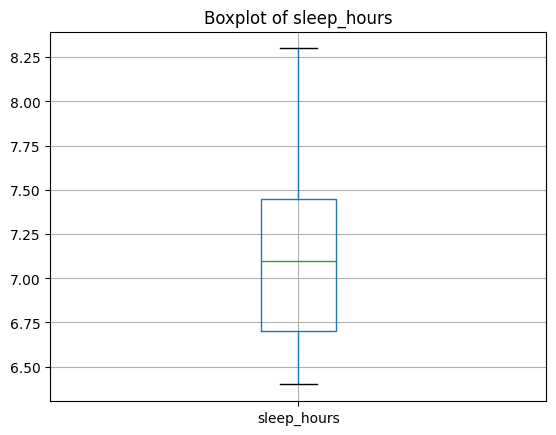

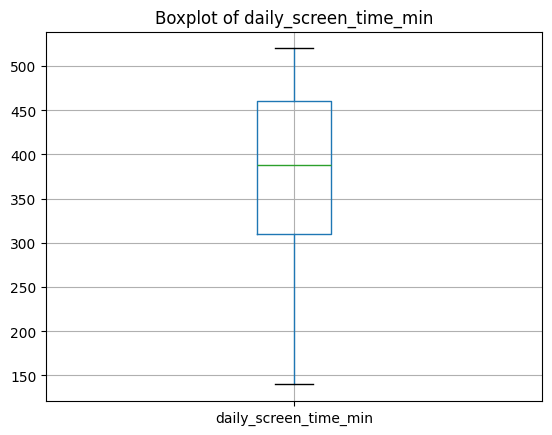

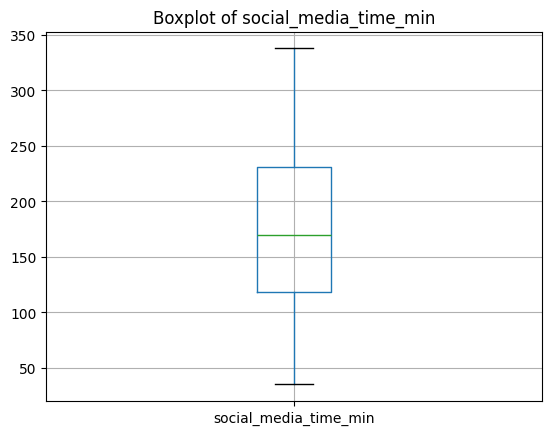

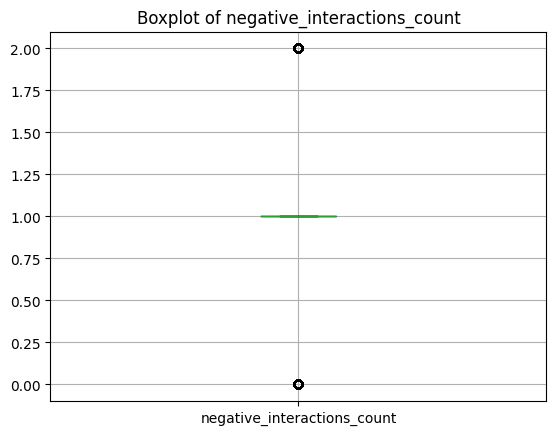

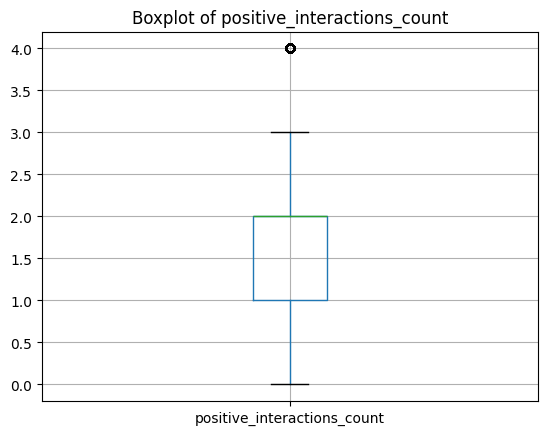

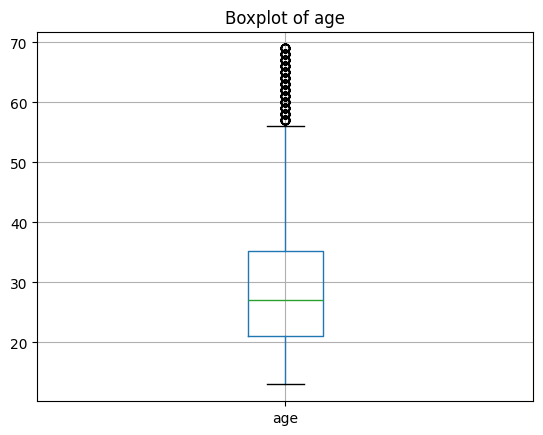

In [ ]:
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure()
    Data.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(Data[numeric_cols]))
outliers_z = (z_scores > 3).sum(axis=0)

print("Outliers detected using Z-score (>3):")
pd.Series(outliers_z, index=numeric_cols)


Outliers detected using Z-score (>3):


,0
sleep_hours,0
daily_screen_time_min,0
social_media_time_min,0
negative_interactions_count,0
positive_interactions_count,0
age,64




---



Stage #6 – Conclusion and Recommendations
=========================================

1. Conclusions
  * Conclusion from Statistical Test
  * Conclusion from Regression Analysis
2. Business Recommendations
3. Recommendations for the Next Experiment





---



Code for Medium
===============

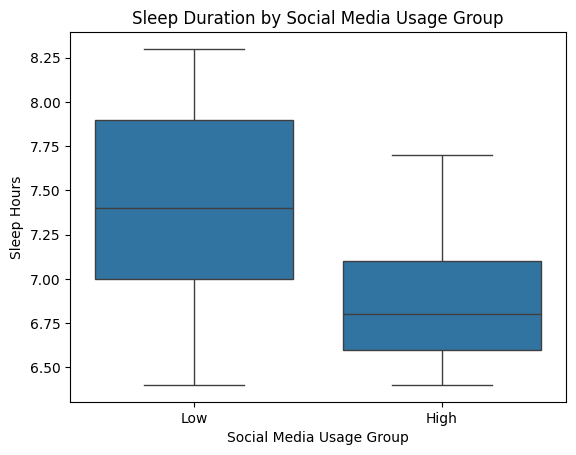

In [ ]:
# Graph 1 — “Do heavy users sleep less?”
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x="group",
    y="sleep_hours",
    data=Data
)

plt.title("Sleep Duration by Social Media Usage Group")
plt.xlabel("Social Media Usage Group")
plt.ylabel("Sleep Hours")
plt.show()



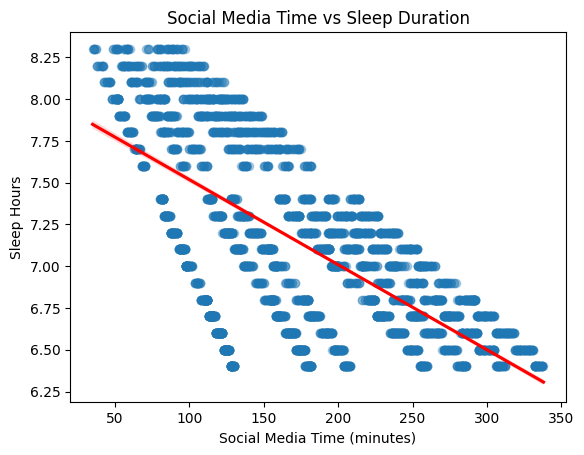

In [ ]:
# 📉 Graph 2 — “The scrolling–sleep tradeoff”
sns.regplot(
    x="social_media_time_min",
    y="sleep_hours",
    data=Data,
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)

plt.title("Social Media Time vs Sleep Duration")
plt.xlabel("Social Media Time (minutes)")
plt.ylabel("Sleep Hours")
plt.show()


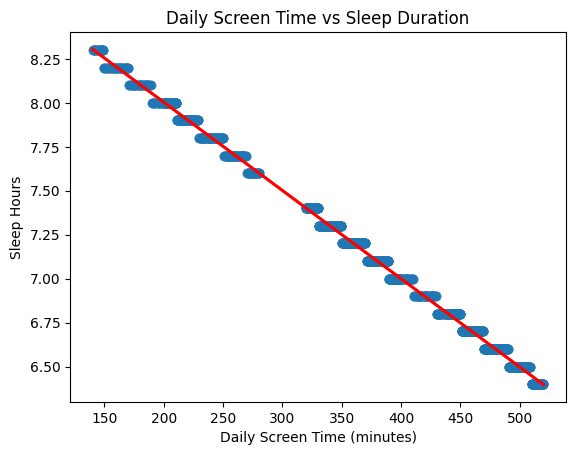

In [ ]:
# 📈 Graph 3 — “It’s not just social media”
sns.regplot(
    x="daily_screen_time_min",
    y="sleep_hours",
    data=Data,
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)

plt.title("Daily Screen Time vs Sleep Duration")
plt.xlabel("Daily Screen Time (minutes)")
plt.ylabel("Sleep Hours")
plt.show()
